In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [41]:
data = pd.read_csv("Unemployment in India.csv")
data = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [42]:
print(data.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [43]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

In [44]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


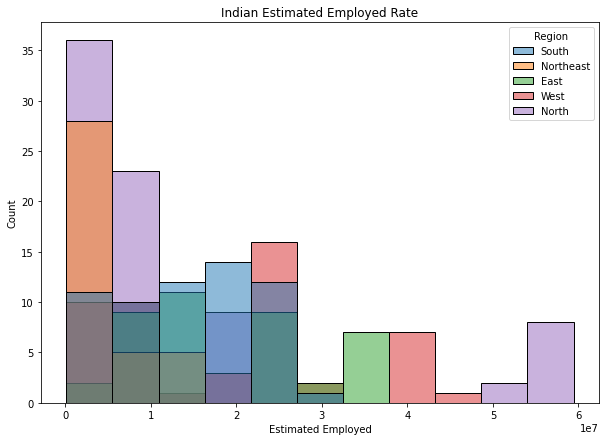

In [45]:
plt.figure(figsize=(10,7))
plt.title("Indian Estimated Employed Rate")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

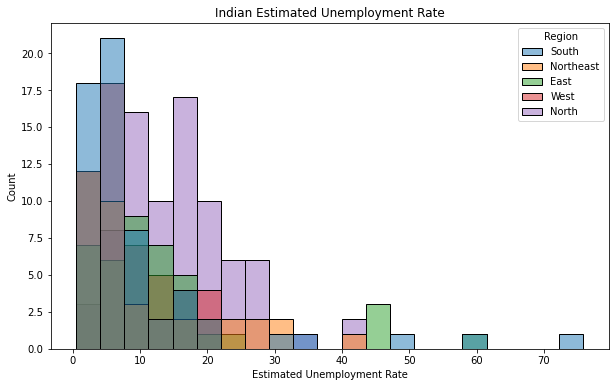

In [46]:
plt.figure(figsize=(10, 6))
plt.title("Indian Estimated Unemployment Rate")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()

In [47]:
figure=px.histogram(data,x="Estimated Labour Participation Rate",y="States",color="Region")
figure.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Chhattisgarh'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Goa'),
  Text(6, 0, 'Gujarat'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Himachal Pradesh'),
  Text(9, 0, 'Jammu & Kashmir'),
  Text(10, 0, 'Jharkhand'),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Kerala'),
  Text(13, 0, 'Madhya Pradesh'),
  Text(14, 0, 'Maharashtra'),
  Text(15, 0, 'Meghalaya'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Punjab'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana'),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'West Bengal')])

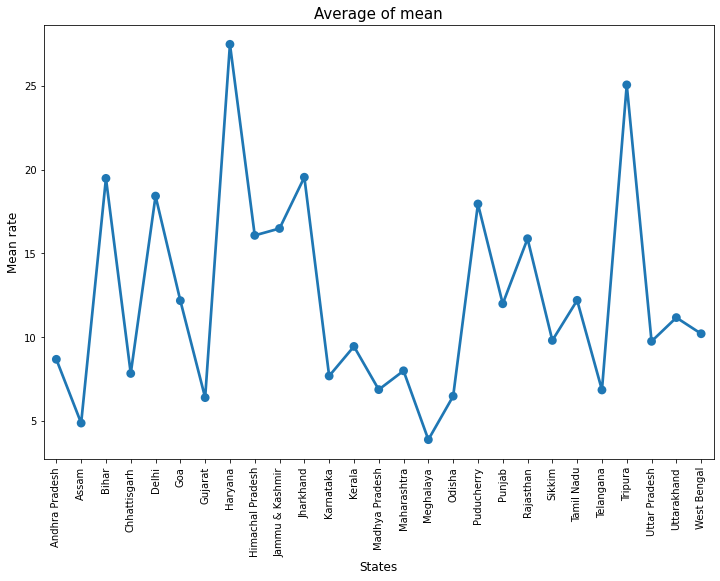

In [48]:
# take the mean of rate state by state
grouped_data = data.groupby(["States"])["Estimated Unemployment Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_data['States'].values, grouped_data['Estimated Unemployment Rate'].values, alpha=0.8)
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'East'),
  Text(1, 0, 'North'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'South'),
  Text(4, 0, 'West')])

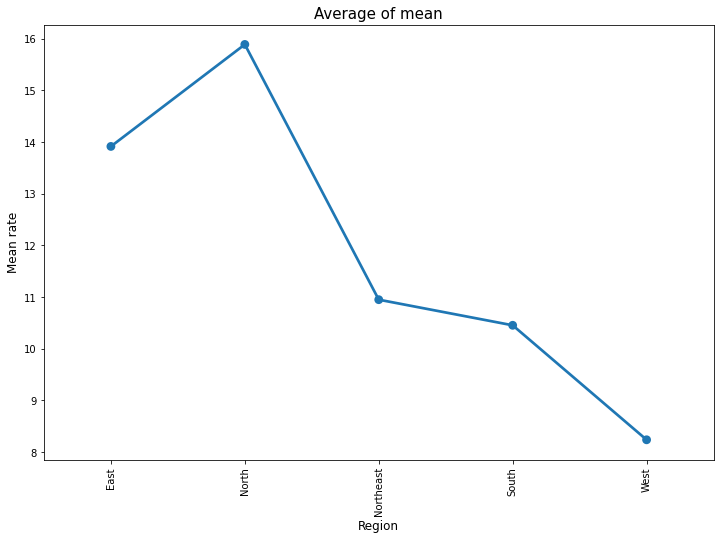

In [49]:
grouped_data = data.groupby(["Region"])["Estimated Unemployment Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_data['Region'].values, grouped_data['Estimated Unemployment Rate'].values, alpha=0.8)
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')

In [50]:
unemployment = data[["States", "Region", "Estimated Unemployment Rate"]]

fig = px.sunburst(unemployment, path=['Region','States'], values='Estimated Unemployment Rate',title= 'Unemployment rate in every State and Region', height=650)
fig.show()